In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sea
import numpy as np
from scipy.optimize import curve_fit

In [7]:
def display_difference(test_array, prediction_array):
    """
    Calculates, displays, and visualizes the difference between two arrays

    Args:
        test_array:  A NumPy array representing the true (test) values.
        prediction_array: A NumPy array representing the model's predictions.

    Returns:
        None. Displays summary statistics, and displays a scatter plot with the x-axis showing the test values.
    """

    # Ensure the arrays have the same shape
    if test_array.shape != prediction_array.shape:
        print(f"Error: Arrays have different shapes")
        return  

    # Calculate the differences
    differences = test_array - prediction_array

    # Create a sorted index based on test_array values
    sorted_indices = np.argsort(test_array)

    # Use the sorted indices to reorder test_array, prediction_array, and differences
    sorted_test_array = test_array[sorted_indices]
    sorted_prediction_array = prediction_array[sorted_indices]
    sorted_differences = differences[sorted_indices]
    

    # display some summary statistics of the differences:
    print(f"\nSummary Statistics of Differences:")
    print(f"Mean Difference: {np.mean(sorted_differences):.4f}")
    print(f"Max Difference: {np.max(sorted_differences):.4f}")
    print(f"Min Difference: {np.min(sorted_differences):.4f}")
    print(f"Standard Deviation of Differences: {np.std(sorted_differences):.4f}")

    # Create a scatter plot of the differences, with x-axis as test values
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.scatter(sorted_test_array, sorted_differences, color='b') # Changed to plt.scatter
    plt.title("Difference between Test and Prediction Values ")
    plt.xlabel("Test Value ")
    plt.ylabel("Difference (Test - Prediction)")
    plt.grid(True)
    plt.show()  

In [8]:
def print_metrics(y_test, y_prediction, model_name):
    """
    Calculates and prints the Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
    and R-squared (R2) for a given set of test and predicted values.

    Args:
        y_test:  The true values.
        y_pred:  The predicted values.
        mo
(a) Origin: This dataset was taken from the StatLib library which isdel_name: Name of the model.
    """
    mse = mean_squared_error(y_test, y_prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_prediction)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

In [9]:
# 1. Load the data
df = pd.read_csv('data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Feature Description
key features in the Boston Housing Dataset:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for large lots

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk-0.63)^2 where Bk is the proportion of Black residents by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s (the target variable)

In [10]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

5 RM null values, We will fill them out by the median

In [11]:
df['RM'] = df['RM'].fillna(df['RM'].median())
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.shape

(511, 14)

In [13]:
int(df.duplicated().sum())

0

/tmp/ipykernel_128671/1184835587.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sea.histplot(data=df['MEDV'],kde=True,palette="YlGnBu")


<Axes: xlabel='MEDV', ylabel='Count'>

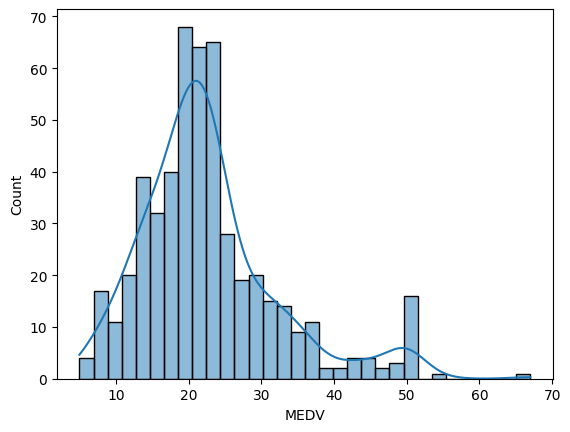

In [14]:
sea.histplot(data=df['MEDV'],kde=True,palette="YlGnBu")

It seems most houses MEDV fall between 10K$ and 30k$

In [15]:
print(f"Average MEDV: {float(np.average(df['MEDV']))}")

Average MEDV: 22.68219178082192


In [16]:
print(f"Median MEDV: {float(np.median(df['MEDV']))}")

Median MEDV: 21.2


lets have a quick look at the features distribution

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

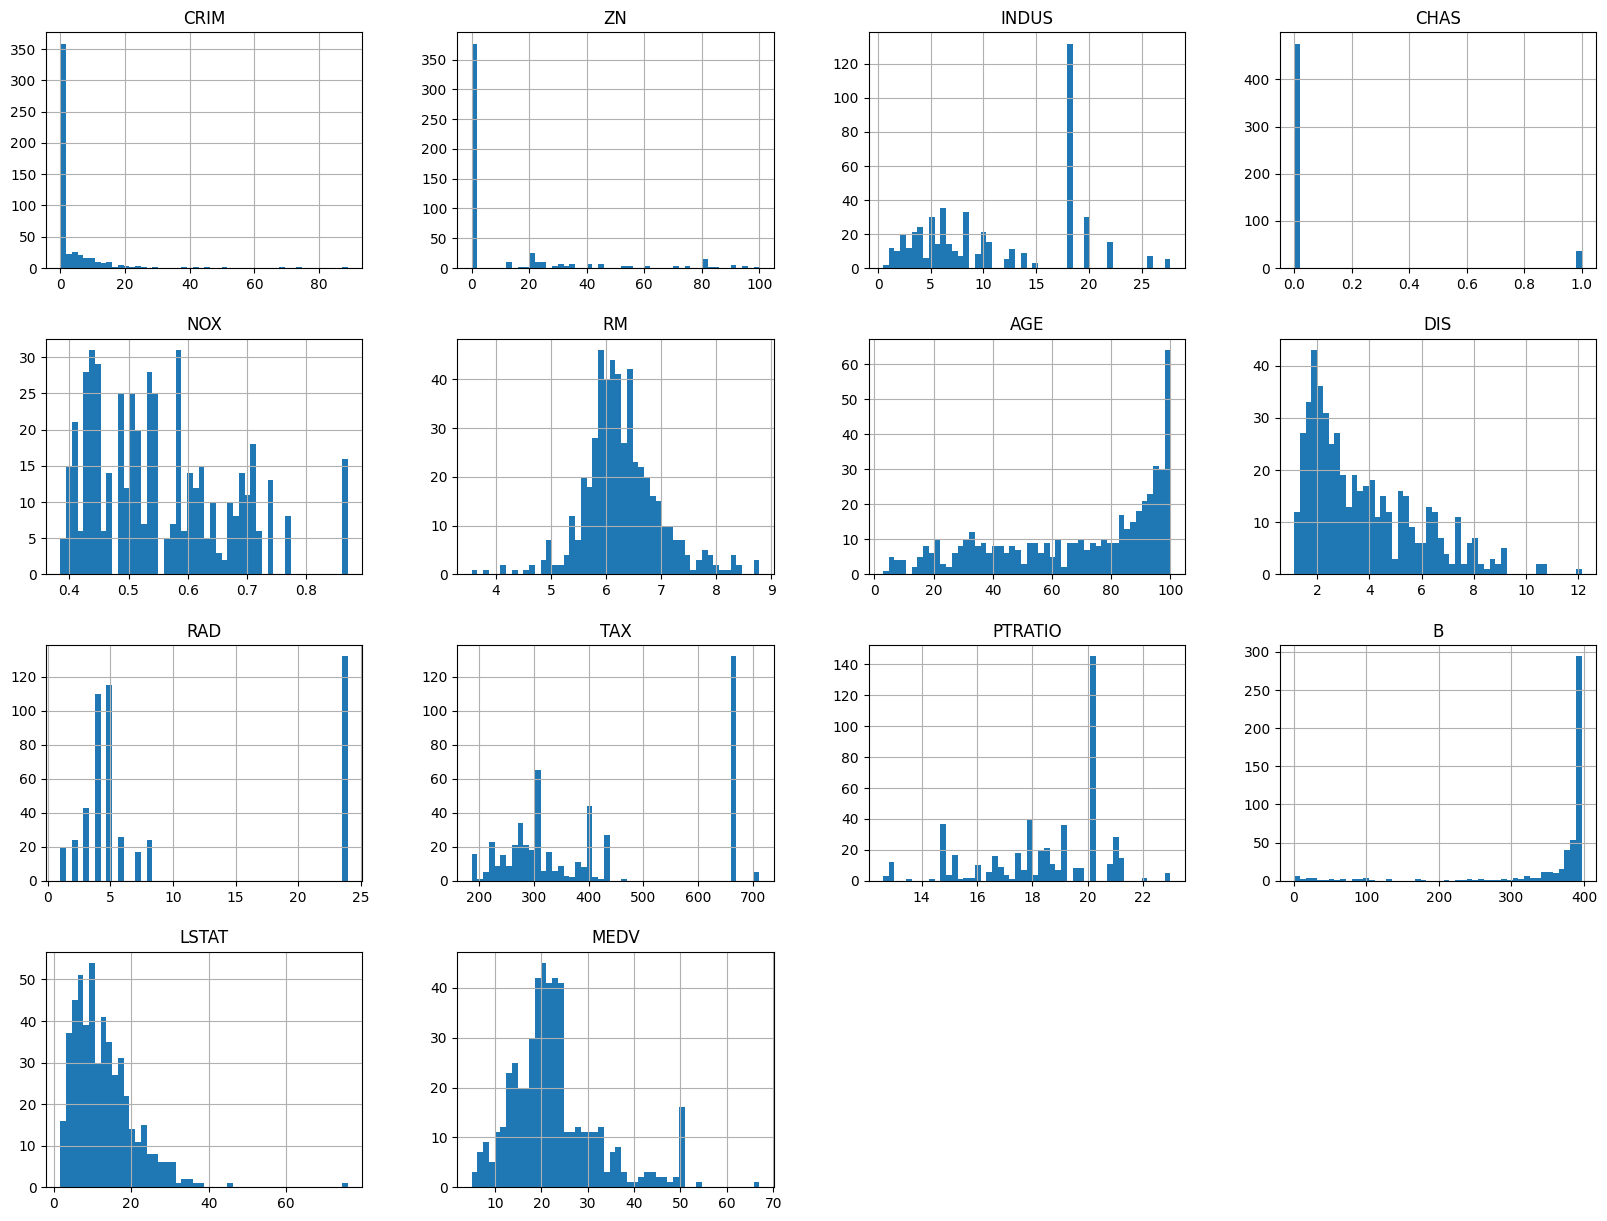

In [17]:
df.hist(bins=50, figsize=(20, 15))

<Axes: >

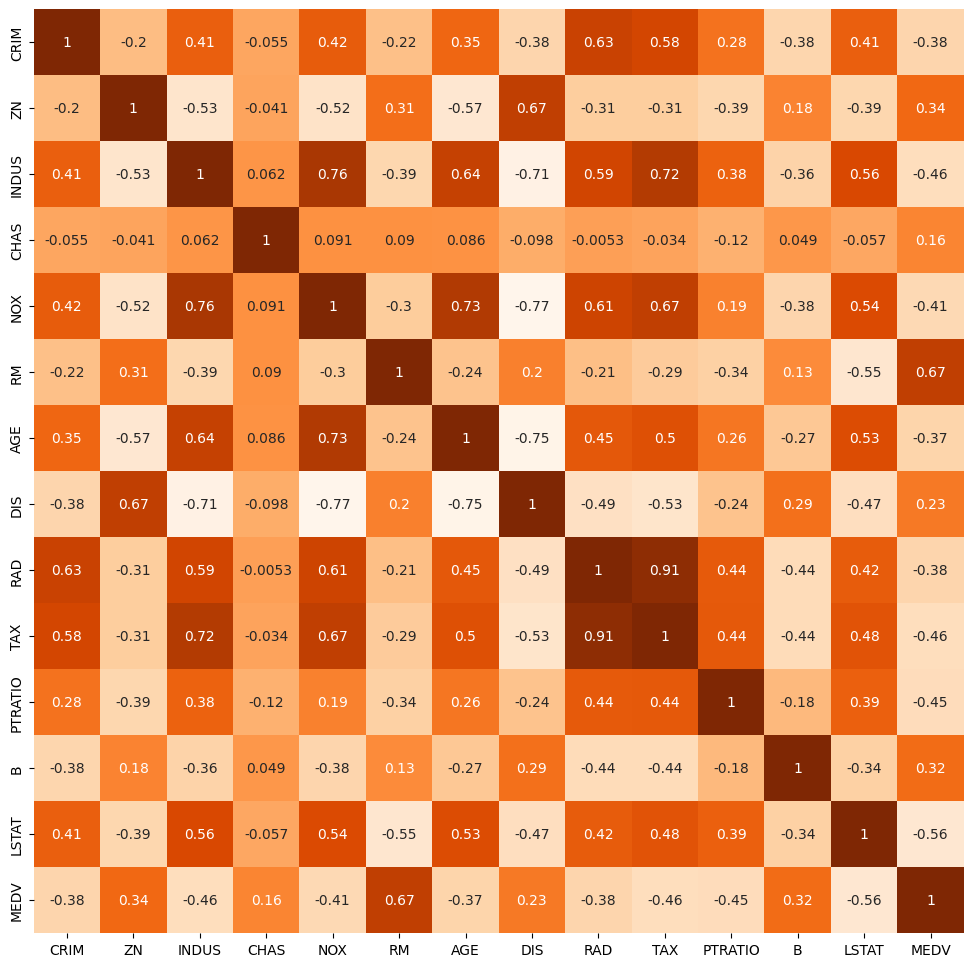

In [18]:
plt.figure(figsize=(12,12))
sea.heatmap(df.corr(),annot=True,cmap='Oranges',cbar=False)

There seems to be strong correlation between RAD and TAX,as well as NOX and INDUS

In [19]:
# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [20]:
# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# 6. Choose a model 
model = LinearRegression()

In [23]:
# 7. Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# 8. Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# 9. Evaluate the model
print_metrics(y_test, y_pred, "Linear Regression")


Linear Regression - MSE: 29.66, RMSE: 5.45, R-squared: 0.70



Summary Statistics of Differences:
Mean Difference: 0.1425
Max Difference: 24.2449
Min Difference: -10.5023
Standard Deviation of Differences: 5.4444


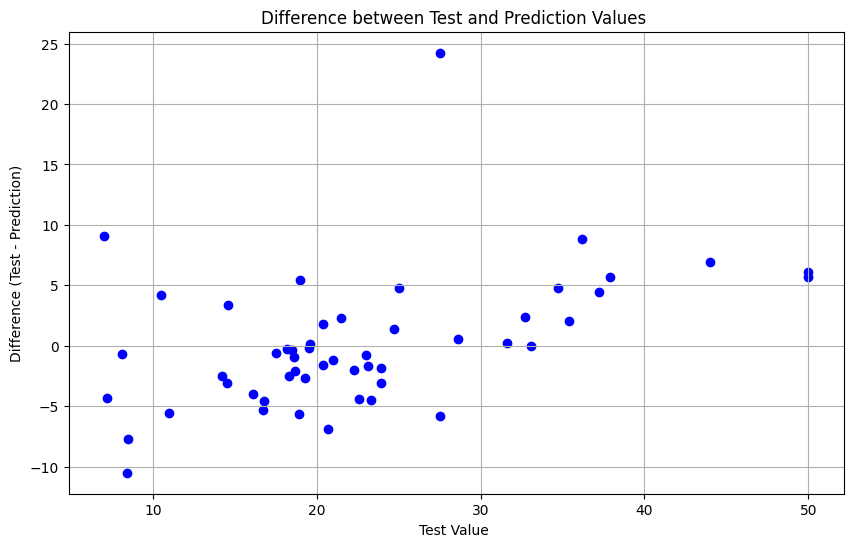

In [27]:
display_difference(np.array(y_test) ,np.array(y_pred))

This is OK but we can sure do bettwer. We will go through Some other models that may perform different and see which one could be a good fit

In [28]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
print_metrics(y_test, ridge_predictions, "ridge model")

ridge model - MSE: 29.19, RMSE: 5.40, R-squared: 0.71



Summary Statistics of Differences:
Mean Difference: 0.1164
Max Difference: 24.0069
Min Difference: -10.6588
Standard Deviation of Differences: 5.4019


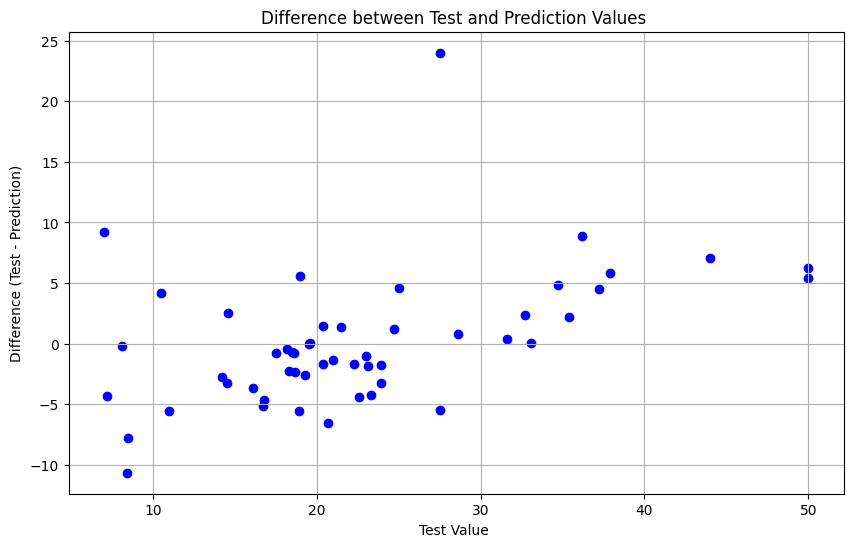

In [29]:
display_difference(np.array(y_test) ,np.array(ridge_predictions))

In [30]:
rf_model = RandomForestRegressor(n_estimators=190, random_state=20) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print_metrics(y_test, rf_predictions, "Random Forest Regressor")

Random Forest Regressor - MSE: 8.37, RMSE: 2.89, R-squared: 0.92



Summary Statistics of Differences:
Mean Difference: -0.0434
Max Difference: 10.9384
Min Difference: -5.0616
Standard Deviation of Differences: 2.8923


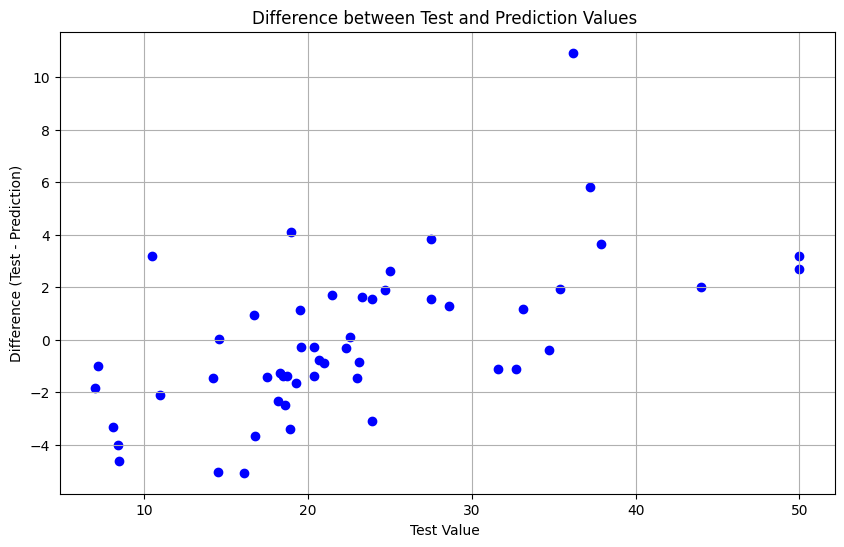

In [31]:
display_difference(np.array(y_test) ,np.array(rf_predictions))

In [32]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
print_metrics(y_test, y_pred_lasso, "Lasso Regressor")

Lasso Regressor - MSE: 35.44, RMSE: 5.95, R-squared: 0.64



Summary Statistics of Differences:
Mean Difference: 0.0947
Max Difference: 23.1789
Min Difference: -12.7234
Standard Deviation of Differences: 5.9527


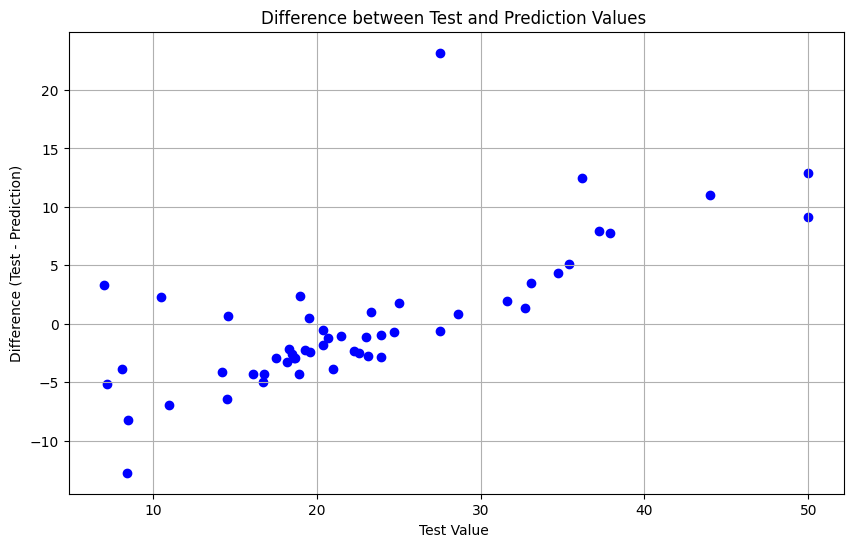

In [33]:
display_difference(np.array(y_test) ,np.array(y_pred_lasso))

We can see that The Lasso Regressor has a trend of marking houses that worth below the median lower than they actually do,and somewhat above for houses above the median. We could try and fit a linear model.

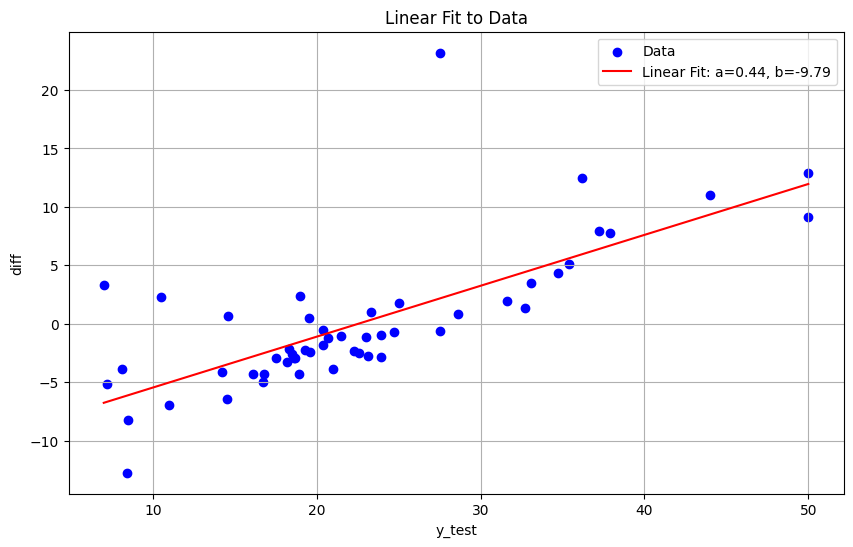

[[ 0.00335584 -0.07627438]
 [-0.07627438  2.06669893]]


In [34]:
def linear_line(x, a, b):
    return a*x + b 


popt, pcov = curve_fit(linear_line, y_test, y_test - y_pred_lasso, maxfev=5000)
a, b = popt  

x_fit = np.linspace(np.min(y_test), np.max(y_test), 100)  
y_fit = linear_line(x_fit, a, b)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred_lasso, label='Data', color='blue')  
plt.plot(x_fit, y_fit, label=f'Linear Fit: a={a:.2f}, b={b:.2f}', color='red')  
plt.xlabel('y_test')
plt.ylabel('diff')
plt.title('Linear Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

print(pcov)

The fact that 'a' is 0.44 and not 0 suggests that there is a linear trend in the error (Ideally, the errors should be randomly distributed around zero). This pattern in the errors suggests that the Regressor is systematically estimating the target variable in a wrong way except for some specific values (where the fit's y=0, coincidently falling around the median), and that the error is dependent on the value of the target's MEDV.

In [35]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = linear_reg_poly.predict(X_test_poly)
print_metrics(y_test, y_pred_poly, "Polynomial Regressor")

Polynomial Regressor - MSE: 13.37, RMSE: 3.66, R-squared: 0.87



Summary Statistics of Differences:
Mean Difference: -0.7090
Max Difference: 7.9416
Min Difference: -8.5912
Standard Deviation of Differences: 3.5870


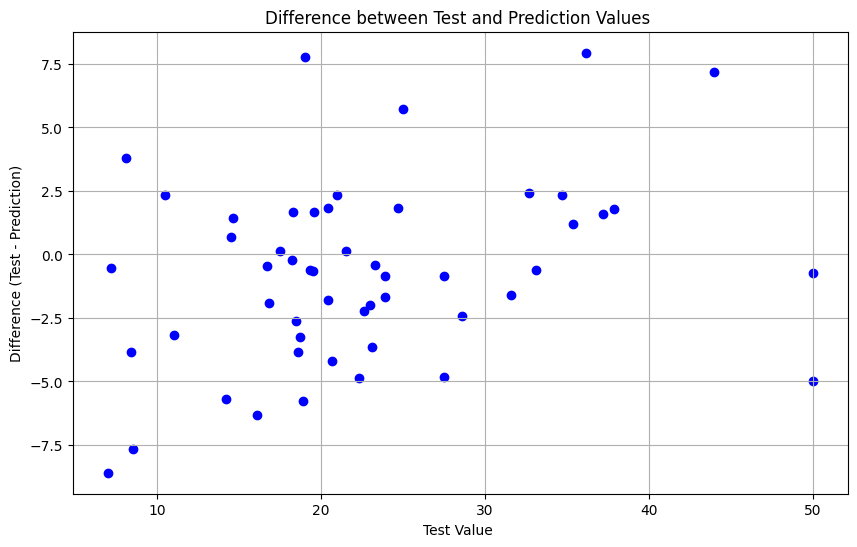

In [36]:
display_difference(np.array(y_test) ,np.array(y_pred_poly))

In [37]:
bayesian_ridge_reg = BayesianRidge()
bayesian_ridge_reg.fit(X_train_scaled, y_train)
y_pred_bayesian_ridge = bayesian_ridge_reg.predict(X_test_scaled)
print_metrics(y_test, y_pred_poly, "Bayesian Ridge Regressor")

Bayesian Ridge Regressor - MSE: 13.37, RMSE: 3.66, R-squared: 0.87



Summary Statistics of Differences:
Mean Difference: 0.1201
Max Difference: 23.9582
Min Difference: -10.3737
Standard Deviation of Differences: 5.4350


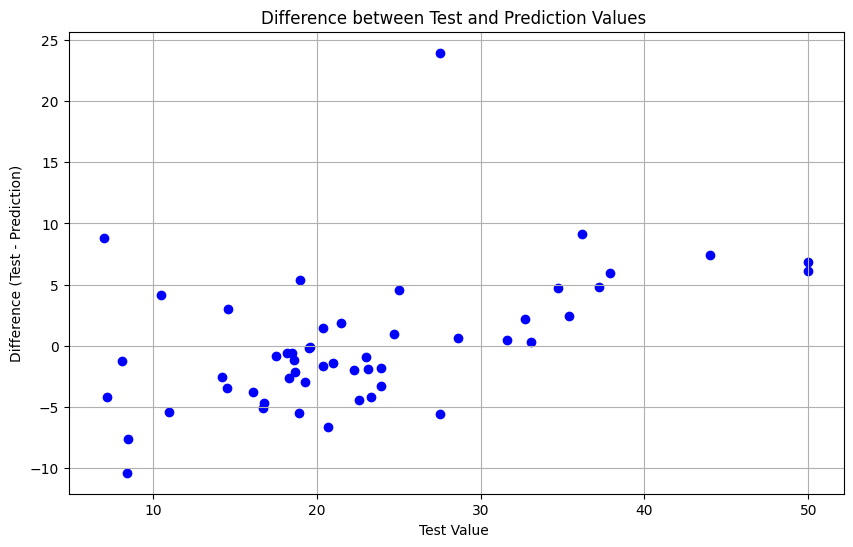

In [38]:
display_difference(np.array(y_test) ,np.array(y_pred_bayesian_ridge))

In [39]:
sgd_reg = SGDRegressor(max_iter=490, tol=1e-4, random_state=79)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)
print_metrics(y_test, y_pred_sgd, "SGD Regressor")

SGD Regressor - MSE: 30.19, RMSE: 5.49, R-squared: 0.70



Summary Statistics of Differences:
Mean Difference: 0.1371
Max Difference: 24.3383
Min Difference: -10.6632
Standard Deviation of Differences: 5.4930


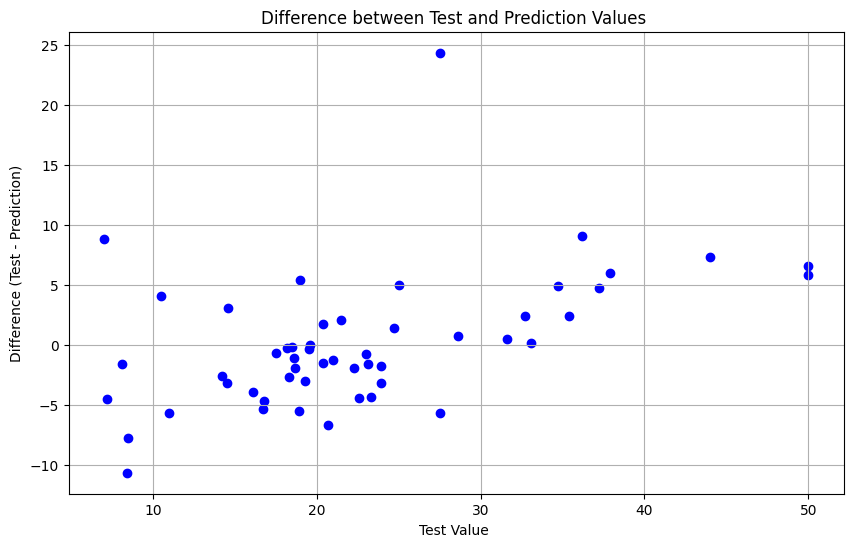

In [40]:
display_difference(np.array(y_test) ,np.array(y_pred_sgd))

In [41]:
tree_reg = DecisionTreeRegressor(random_state=39)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print_metrics(y_test, y_pred_tree, "Decision Tree Regressor")

Decision Tree Regressor - MSE: 10.40, RMSE: 3.23, R-squared: 0.90



Summary Statistics of Differences:
Mean Difference: -0.9115
Max Difference: 6.6000
Min Difference: -8.1000
Standard Deviation of Differences: 3.0942


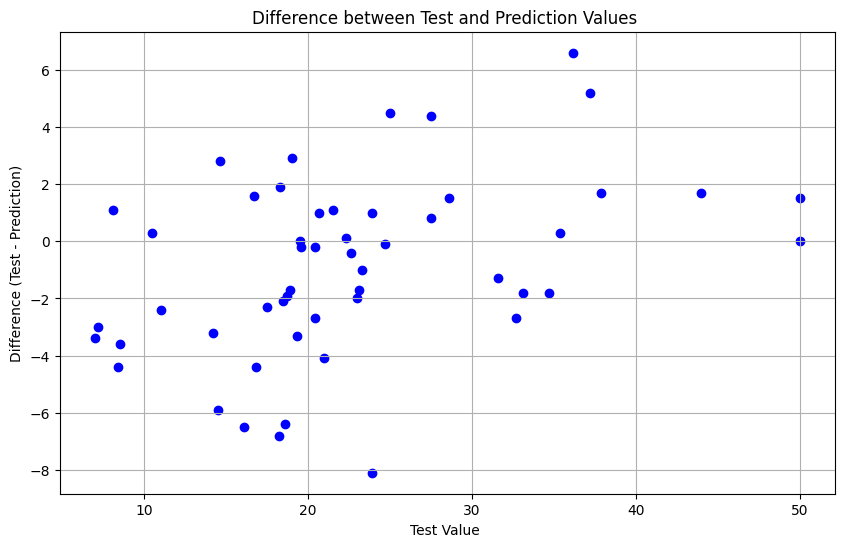

In [42]:
display_difference(np.array(y_test) ,np.array(y_pred_tree))

In [43]:
gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=0.08, max_depth=5, random_state=50)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
print_metrics(y_test, y_pred_gb, "Gradient Boosting Regressor")

Gradient Boosting Regressor - MSE: 6.57, RMSE: 2.56, R-squared: 0.93



Summary Statistics of Differences:
Mean Difference: -0.1450
Max Difference: 9.1091
Min Difference: -5.0585
Standard Deviation of Differences: 2.5595


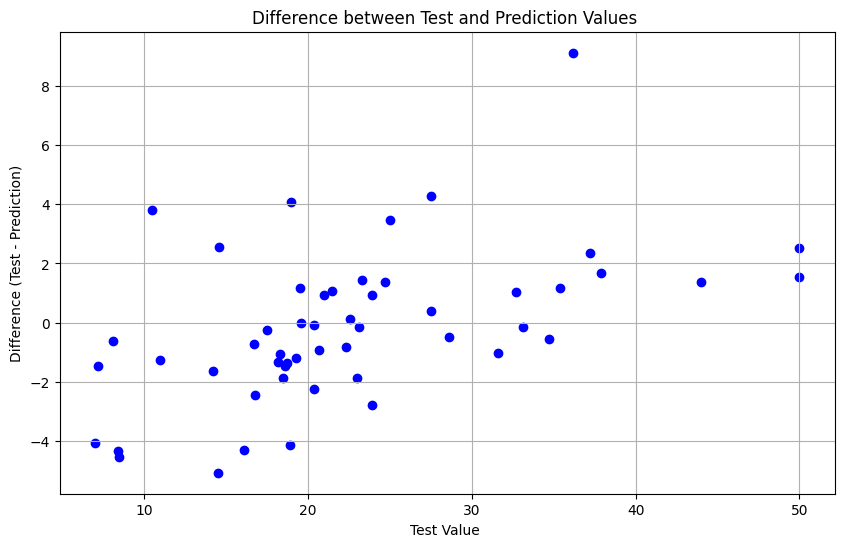

In [44]:
display_difference(np.array(y_test) ,np.array(y_pred_gb))

In [45]:
ada_reg = AdaBoostRegressor(n_estimators=70, learning_rate=0.7, random_state=32)
ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)
print_metrics(y_test, y_pred_ada, "AdaBoost Regressor")

AdaBoost Regressor - MSE: 18.27, RMSE: 4.27, R-squared: 0.82



Summary Statistics of Differences:
Mean Difference: -0.7892
Max Difference: 10.9197
Min Difference: -6.7467
Standard Deviation of Differences: 4.2006


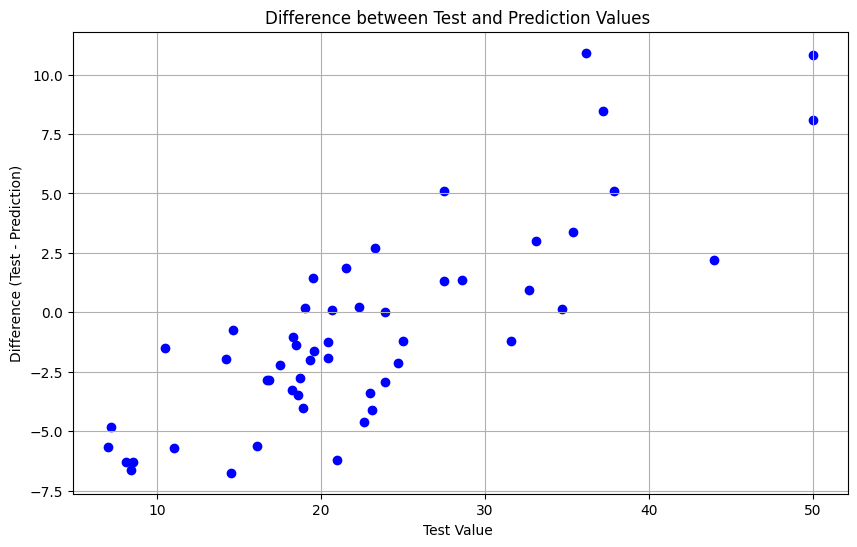

In [46]:
display_difference(np.array(y_test) ,np.array(y_pred_ada))

In [47]:
hist_gb_reg = HistGradientBoostingRegressor(random_state=70)
hist_gb_reg.fit(X_train, y_train)
y_pred_hist_gb = hist_gb_reg.predict(X_test)
print_metrics(y_test, y_pred_hist_gb, "Hist-Gradient-Boosting Regressor")

Hist-Gradient-Boosting Regressor - MSE: 7.99, RMSE: 2.83, R-squared: 0.92



Summary Statistics of Differences:
Mean Difference: 0.3328
Max Difference: 9.7734
Min Difference: -4.4481
Standard Deviation of Differences: 2.8076


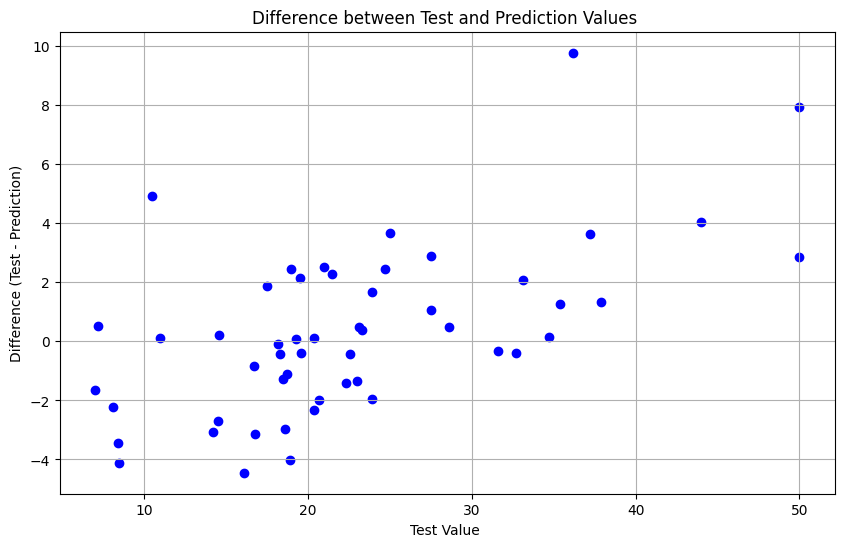

In [48]:
display_difference(np.array(y_test) ,np.array(y_pred_hist_gb))

In [49]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")

K-Nearest Neighbors Regressor - MSE: 11.37, RMSE: 3.37, R-squared: 0.89



Summary Statistics of Differences:
Mean Difference: 0.5641
Max Difference: 11.8667
Min Difference: -5.2667
Standard Deviation of Differences: 3.3237


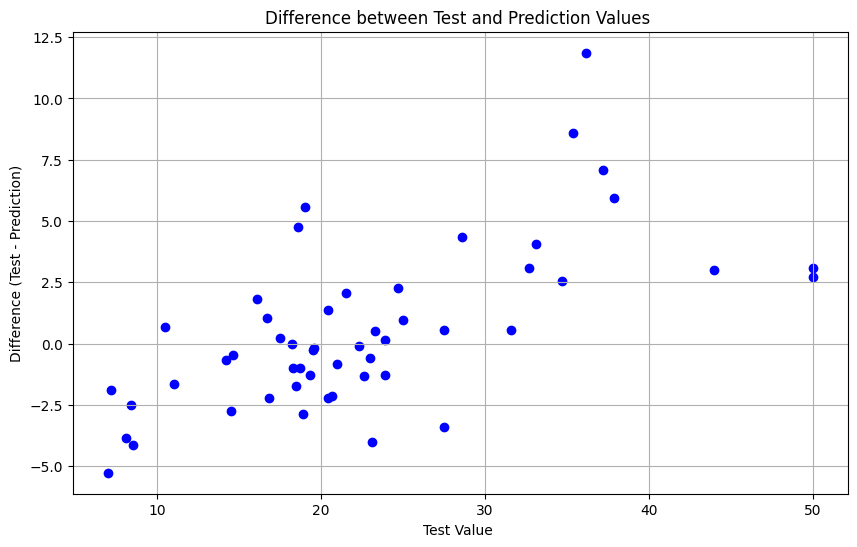

In [50]:
display_difference(np.array(y_test) ,np.array(y_pred_knn))

To summarize, the 3 best performing regressors for this task were Gradient Boosting Regressor, Hist-Gradient-Boosting Regressor and Random Forest Regressor in that order with:

Gradient Boosting Regressor - MSE: 6.57, RMSE: 2.56, R-squared: 0.93

Hist-Gradient-Boosting Regressor - MSE: 7.99, RMSE: 2.83, R-squared: 0.92

Random Forest Regressor - MSE: 8.37, RMSE: 2.89, R-squared: 0.92

All of which with the benchmark of R-squared greater than 0.90 and RMSE less than 2.9 which equates to an error of 2900$ in an estimation (while performing even better with data that is centered aroudn the median). A potential base for future predictions could be the Gradient Boosting Regressor.